This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.6111 - accuracy: 0.8145 - val_loss: 0.3294 - val_accuracy: 0.8993
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2528 - accuracy: 0.9217 - val_loss: 0.2062 - val_accuracy: 0.9363
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1634 - accuracy: 0.9496 - val_loss: 0.1963 - val_accuracy: 0.9387
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1180 - accuracy: 0.9630 - val_loss: 0.1590 - val_accuracy: 0.9530
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0860 - accuracy: 0.9730 - val_loss: 0.1239 - val_accuracy: 0.9631
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0642 - accuracy: 0.9794 - val_loss: 0.1138 - val_accuracy: 0.9687
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0483 - accuracy: 0.9845 - val_loss: 0.1266 - val_accuracy: 0.9654
Epoch 

**Plotting a validation accuracy comparison**

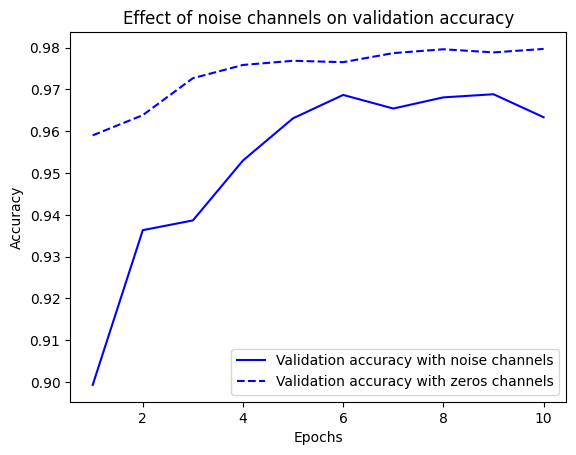

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3164 - accuracy: 0.1029 - val_loss: 2.3069 - val_accuracy: 0.0996
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.3003 - accuracy: 0.1162 - val_loss: 2.3111 - val_accuracy: 0.1008
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2904 - accuracy: 0.1266 - val_loss: 2.3160 - val_accuracy: 0.1042
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2768 - accuracy: 0.1388 - val_loss: 2.3271 - val_accuracy: 0.1015
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2590 - accuracy: 0.1536 - val_loss: 2.3388 - val_accuracy: 0.1036
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2378 - accuracy: 0.1681 - val_loss: 2.3462 - val_accuracy: 0.1009
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2123 - accuracy: 0.1858 - val_loss: 2.3667 - val_accuracy: 0.1029

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 892.9560 - accuracy: 0.3917 - val_loss: 2.1216 - val_accuracy: 0.3367
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 4.0482 - accuracy: 0.2786 - val_loss: 2.1928 - val_accuracy: 0.2339
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8931 - accuracy: 0.2473 - val_loss: 2.0985 - val_accuracy: 0.2459
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7376 - accuracy: 0.2649 - val_loss: 2.3429 - val_accuracy: 0.2233
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5962 - accuracy: 0.2622 - val_loss: 2.4300 - val_accuracy: 0.3222
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6503 - accuracy: 0.2776 - val_loss: 2.1341 - val_accuracy: 0.2492
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3003 - accuracy: 0.2573 - val_loss: 3.4426 - val_accuracy: 0.2578
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4003 - accuracy: 0.9088 - val_loss: 0.1631 - val_accuracy: 0.9542
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1352 - accuracy: 0.9651 - val_loss: 0.1736 - val_accuracy: 0.9592
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1126 - accuracy: 0.9726 - val_loss: 0.1821 - val_accuracy: 0.9628
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0936 - accuracy: 0.9781 - val_loss: 0.1829 - val_accuracy: 0.9685
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0759 - accuracy: 0.9826 - val_loss: 0.1820 - val_accuracy: 0.9712
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0683 - accuracy: 0.9855 - val_loss: 0.2028 - val_accuracy: 0.9716
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0729 - accuracy: 0.9861 - val_loss: 0.2807 - val_accuracy: 0.9671
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 0s 855us/step - loss: 0.6639 - accuracy: 0.8384 - val_loss: 0.3589 - val_accuracy: 0.9030
Epoch 2/20
375/375 [==============================] - 0s 964us/step - loss: 0.3509 - accuracy: 0.9026 - val_loss: 0.3084 - val_accuracy: 0.9147
Epoch 3/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3151 - accuracy: 0.9120 - val_loss: 0.2895 - val_accuracy: 0.9194
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.9165 - val_loss: 0.2808 - val_accuracy: 0.9225
Epoch 5/20
375/375 [==============================] - 0s 731us/step - loss: 0.2893 - accuracy: 0.9189 - val_loss: 0.2776 - val_accuracy: 0.9217
Epoch 6/20
375/375 [==============================] - 0s 658us/step - loss: 0.2826 - accuracy: 0.9215 - val_loss: 0.2706 - val_accuracy: 0.9251
Epoch 7/20
375/375 [==============================] - 0s 609us/step - loss: 0.2781 - accuracy: 0.9225 - val_loss: 0.2701 - val_accuracy: 0.9

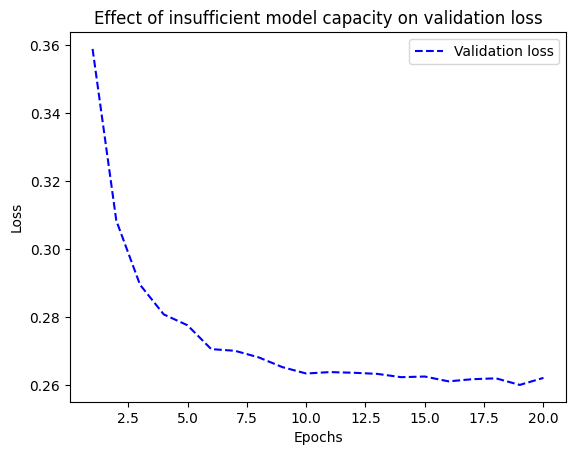

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3527 - accuracy: 0.8985 - val_loss: 0.1808 - val_accuracy: 0.9487
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1529 - accuracy: 0.9546 - val_loss: 0.1274 - val_accuracy: 0.9622
Epoch 3/20
375/375 [==============================] - 1s 1ms/step - loss: 0.1081 - accuracy: 0.9672 - val_loss: 0.1044 - val_accuracy: 0.9680
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0832 - accuracy: 0.9754 - val_loss: 0.1046 - val_accuracy: 0.9679
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0675 - accuracy: 0.9792 - val_loss: 0.0945 - val_accuracy: 0.9720
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9834 - val_loss: 0.0941 - val_accuracy: 0.9732
Epoch 7/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.1056 - val_accuracy: 0.9721
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5357 - accuracy: 0.7789 - val_loss: 0.3977 - val_accuracy: 0.8595
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3125 - accuracy: 0.8971 - val_loss: 0.3025 - val_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2240 - accuracy: 0.9263 - val_loss: 0.2790 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1744 - accuracy: 0.9425 - val_loss: 0.2725 - val_accuracy: 0.8921
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1370 - accuracy: 0.9576 - val_loss: 0.3035 - val_accuracy: 0.8813
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1138 - accuracy: 0.9651 - val_loss: 0.2974 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0907 - accuracy: 0.9743 - val_loss: 0.3405 - val_accuracy: 0.8782
Epoch 8/20
30/30 [

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6065 - accuracy: 0.7443 - val_loss: 0.5159 - val_accuracy: 0.8520
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4531 - accuracy: 0.8801 - val_loss: 0.4194 - val_accuracy: 0.8775
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3603 - accuracy: 0.9039 - val_loss: 0.3665 - val_accuracy: 0.8815
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2969 - accuracy: 0.9195 - val_loss: 0.3215 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2501 - accuracy: 0.9294 - val_loss: 0.2974 - val_accuracy: 0.8904
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2162 - accuracy: 0.9386 - val_loss: 0.2837 - val_accuracy: 0.8917
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1891 - accuracy: 0.9459 - val_loss: 0.2775 - val_accuracy: 0.8916
Epoch 8/20
30/30 [=

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 79ms/step - loss: 0.5268 - accuracy: 0.7661 - val_loss: 0.4262 - val_accuracy: 0.8106
Epoch 2/20
30/30 [==============================] - 2s 67ms/step - loss: 0.2551 - accuracy: 0.8957 - val_loss: 0.2751 - val_accuracy: 0.8843
Epoch 3/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1386 - accuracy: 0.9495 - val_loss: 0.2957 - val_accuracy: 0.8918
Epoch 4/20
30/30 [==============================] - 2s 63ms/step - loss: 0.0935 - accuracy: 0.9714 - val_loss: 0.4372 - val_accuracy: 0.8778
Epoch 5/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1158 - accuracy: 0.9761 - val_loss: 0.3222 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 2s 64ms/step - loss: 0.0060 - accuracy: 0.9995 - val_loss: 0.4821 - val_accuracy: 0.8893
Epoch 7/20
30/30 [==============================] - 2s 58ms/step - loss: 9.7668e-04 - accuracy: 0.9999 - val_loss: 0.6039 - val_accuracy: 0.8880
Epoch 8/2

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 36ms/step - loss: 0.6113 - accuracy: 0.7881 - val_loss: 0.5154 - val_accuracy: 0.8169
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4215 - accuracy: 0.8897 - val_loss: 0.4073 - val_accuracy: 0.8794
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3521 - accuracy: 0.9106 - val_loss: 0.3741 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3190 - accuracy: 0.9190 - val_loss: 0.3661 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2971 - accuracy: 0.9257 - val_loss: 0.3624 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2834 - accuracy: 0.9301 - val_loss: 0.3659 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2697 - accuracy: 0.9369 - val_loss: 0.3716 - val_accuracy: 0.8833
Epoch 8/20
30/30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6439 - accuracy: 0.6247 - val_loss: 0.5509 - val_accuracy: 0.8016
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.5423 - accuracy: 0.7414 - val_loss: 0.4472 - val_accuracy: 0.8545
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.4623 - accuracy: 0.8074 - val_loss: 0.3750 - val_accuracy: 0.8803
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4059 - accuracy: 0.8471 - val_loss: 0.3412 - val_accuracy: 0.8797
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3526 - accuracy: 0.8753 - val_loss: 0.3045 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3123 - accuracy: 0.8939 - val_loss: 0.2888 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2712 - accuracy: 0.9086 - val_loss: 0.2838 - val_accuracy: 0.8904
Epoch 8/20
30/30 [

## Summary